In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

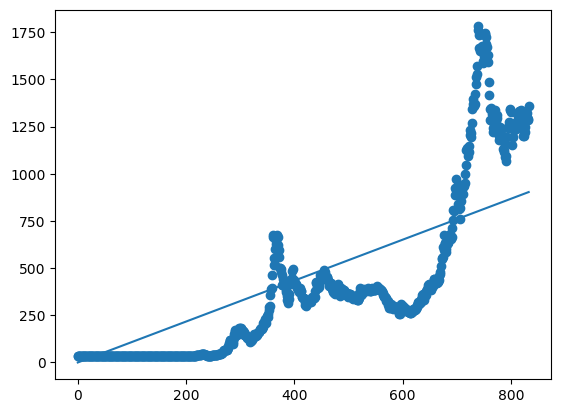

In [60]:
data = pd.read_csv("monthly_prices.csv")
data.head()
Y = np.array(data["Price"])
X = np.arange(len(Y))
plt.scatter(X, Y)

class LinearRegressor:
    def __init__(self):
        self.iterations = 50000
        self.LR = 0.001
        self.a = np.random.random()
        self.b = np.random.random()
    def predict(self, X, a = 0, b = 0):
        predicted = X * (self.a + a) + (self.b + b)
        return predicted
    def mse(self, Y, pred):
        mse = (np.square(pred - Y)).mean()
        return mse
    def fit(self, X, Y):
        for iteration in range(self.iterations):
            possibilities = []
            for a_addend in (-np.random.random(), np.random.random()):
                for b_addend in (-np.random.random(), np.random.random()):
                    possibilities.append((a_addend, b_addend))
                    
            pred = self.predict(X)
            mse = self.mse(Y, pred)
            mses = []
            for a_addend, b_addend in possibilities:
                pred_new = self.predict(X, a_addend, b_addend)
                mses.append(self.mse(Y, pred_new))
            mse_new = min(mses)
            i_mse_new = mses.index(mse_new)
            if mse_new > mse:
                continue
            self.a += possibilities[i_mse_new][0] * self.LR
            self.b += possibilities[i_mse_new][1] * self.LR
        pass
model = LinearRegressor()
model.fit(X,Y)
pred = model.predict(X)
plt.plot(pred)


    